In [ ]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [ ]:
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Downloading the data



Follow these steps to download and prepare the data:
1. Download the train dataset file from https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign? 
2. Upload it to your Colab environment. After you upload you should be able to see the file by running the `ls` command.
3. Unzip it (use the code below)

In [ ]:
# Use this code to upload the data as a backup
FILEID='1p7K1Aw-fZUxha-aLczwZ6Z6cHvu1pEN1'
FILENAME='train.zip'
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILEID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILEID" -O $FILENAME && rm -rf /tmp/cookies.txt

--2020-07-24 00:05:43--  https://docs.google.com/uc?export=download&confirm=DIJ2&id=1p7K1Aw-fZUxha-aLczwZ6Z6cHvu1pEN1
Resolving docs.google.com (docs.google.com)... 74.125.20.101, 74.125.20.102, 74.125.20.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-24-docs.googleusercontent.com/docs/securesc/njcjg437lpc5hol8e8glsqpm4u739buo/aqk0qvj2vsq1knjkk28hnu15au1mjt79/1595549100000/12308918870841825745/14400122945262588673Z/1p7K1Aw-fZUxha-aLczwZ6Z6cHvu1pEN1?e=download [following]
--2020-07-24 00:05:43--  https://doc-00-24-docs.googleusercontent.com/docs/securesc/njcjg437lpc5hol8e8glsqpm4u739buo/aqk0qvj2vsq1knjkk28hnu15au1mjt79/1595549100000/12308918870841825745/14400122945262588673Z/1p7K1Aw-fZUxha-aLczwZ6Z6cHvu1pEN1?e=download
Resolving doc-00-24-docs.googleusercontent.com (doc-00-24-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to 

In [ ]:
ls -lh

total 250M
drwxr-xr-x 1 root root 4.0K Jul 10 16:29 sample_data/
-rw-r--r-- 1 root root 250M Jul 24 00:05 train.zip


The dataset size above should be 250M otherwise it wasn't downloaded properly. Try running the download cell again!

In [ ]:
!unzip -q train.zip -d kaggle_original_data

In [ ]:
!rm -r kaggle_original_data/__MACOSX/
!mv kaggle_original_data/82373_191501_upload_Train/* kaggle_original_data
!rm -r kaggle_original_data/82373_191501_upload_Train

In [ ]:
!ls -l kaggle_original_data | head

total 2044
drwxrwxrwx 2 root root  12288 Nov 25  2018 0
drwxrwxrwx 2 root root 118784 Nov 25  2018 1
drwxrwxrwx 2 root root  98304 Nov 25  2018 10
drwxrwxrwx 2 root root  69632 Nov 25  2018 11
drwxrwxrwx 2 root root 110592 Nov 25  2018 12
drwxrwxrwx 2 root root 110592 Nov 25  2018 13
drwxrwxrwx 2 root root  36864 Nov 25  2018 14
drwxrwxrwx 2 root root  36864 Nov 25  2018 15
drwxrwxrwx 2 root root  20480 Nov 25  2018 16


In [ ]:
from random import shuffle
import os, shutil

# list all labels
label_dirs = [str(label) for label in range(0,43)]

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/content/kaggle_original_data'

# The directory where we will
# store our smaller dataset
base_dir = '/content/german_traffic_sign'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training/validation/test label pictures
for target_dir in [train_dir, validation_dir, test_dir]:
    for label in label_dirs:
        dir = os.path.join(target_dir, label)
        os.mkdir(dir)

# Copy 70% of each label to train, 15% to valid, and 15% to test directories
for label in label_dirs:
    fnames = os.listdir(os.path.join(original_dataset_dir, label))
    shuffle(fnames)  # shuffling the list
    n_img_start_valid = int(len(fnames)*0.7)
    n_img_start_test  = int(len(fnames)*0.85)
    for fname in fnames[:n_img_start_valid]:  # train
        src = os.path.join(original_dataset_dir, label, fname)
        dst = os.path.join(train_dir, label, fname)
        shutil.copyfile(src, dst)
    for fname in fnames[n_img_start_valid:n_img_start_test]:  # valid
        src = os.path.join(original_dataset_dir, label, fname)
        dst = os.path.join(validation_dir, label, fname)
        shutil.copyfile(src, dst)
    for fname in fnames[n_img_start_test:]:  # test
        src = os.path.join(original_dataset_dir, label, fname)
        dst = os.path.join(test_dir, label, fname)
        shutil.copyfile(src, dst)

As a sanity check, let's count how many pictures we have in each training split (train / validation / test):

In [ ]:
total_train_imgs = 0
total_valid_imgs = 0
for label in label_dirs:
    print('total images for label', label, 'in training:', len(os.listdir(os.path.join(train_dir, label))),
                                           'in valid:', len(os.listdir(os.path.join(validation_dir, label))),
                                            'in test:', len(os.listdir(os.path.join(test_dir, label))))
    total_train_imgs += len(os.listdir(os.path.join(train_dir, label)))
    total_valid_imgs += len(os.listdir(os.path.join(validation_dir, label)))

total images for label 0 in training: 147 in valid: 31 in test: 32
total images for label 1 in training: 1554 in valid: 333 in test: 333
total images for label 2 in training: 1575 in valid: 337 in test: 338
total images for label 3 in training: 986 in valid: 212 in test: 212
total images for label 4 in training: 1386 in valid: 297 in test: 297
total images for label 5 in training: 1302 in valid: 279 in test: 279
total images for label 6 in training: 294 in valid: 63 in test: 63
total images for label 7 in training: 1007 in valid: 217 in test: 216
total images for label 8 in training: 986 in valid: 212 in test: 212
total images for label 9 in training: 1029 in valid: 220 in test: 221
total images for label 10 in training: 1407 in valid: 301 in test: 302
total images for label 11 in training: 923 in valid: 199 in test: 198
total images for label 12 in training: 1470 in valid: 315 in test: 315
total images for label 13 in training: 1512 in valid: 324 in test: 324
total images for label 14

In [ ]:
print('Total number of training images:', total_train_imgs)
print('Total number of validation images:', total_valid_imgs)

Total number of training images: 27439
Total number of validation images: 5879


## Building our network

We've already built a small convnet for MNIST in the previous example, so you should be familiar with them. We will reuse the same 
general structure: our convnet will be a stack of alternated `Conv2D` (with `relu` activation) and `MaxPooling2D` layers.

However, since we are dealing with bigger images and a more complex problem, we will make our network accordingly larger: it will have one 
more `Conv2D` + `MaxPooling2D` stage. This serves both to augment the capacity of the network, and to further reduce the size of the 
feature maps, so that they aren't overly large when we reach the `Flatten` layer. Here, since we start from inputs of size 150x150 (a 
somewhat arbitrary choice), we end up with feature maps of size 7x7 right before the `Flatten` layer.

Note that the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is 
decreasing (from 148x148 to 7x7). This is a pattern that you will see in almost all convnets.

Since we are attacking a binary classification problem, we are ending the network with a single unit (a `Dense` layer of size 43) and a 
`softmax` activation. This unit will encode the probability that the network is looking at one class or the other.

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(50, 50, 3))
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

conv_base.trainable = False

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(50, 50),
        batch_size=100,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(50, 50),
        batch_size=100,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 27439 images belonging to 43 classes.
Found 5879 images belonging to 43 classes.
Epoch 1/30
 - 12s - loss: 2.5925 - acc: 0.3107 - val_loss: 1.9614 - val_acc: 0.4062
Epoch 2/30
 - 6s - loss: 1.8835 - acc: 0.4466 - val_loss: 1.5161 - val_acc: 0.4880
Epoch 3/30
 - 6s - loss: 1.6425 - acc: 0.5149 - val_loss: 1.3803 - val_acc: 0.5200
Epoch 4/30
 - 6s - loss: 1.5082 - acc: 0.5436 - val_loss: 1.4360 - val_acc: 0.5668
Epoch 5/30
 - 6s - loss: 1.3878 - acc: 0.5799 - val_loss: 1.2861 - val_acc: 0.5843
Epoch 6/30
 - 6s - loss: 1.3043 - acc: 0.5955 - val_loss: 1.1372 - val_acc: 0.6057
Epoch 7/30
 - 6s - loss: 1.2350 - acc: 0.6230 - val_loss: 1.2631 - val_acc: 0.6336
Epoch 8/30
 - 6s - loss: 1.1860 - acc: 0.6358 - val_loss: 1.0076 - val_acc: 0.6258
Epoch 9/30
 - 6s - loss: 1.1383 - acc: 0.6459 - val_loss: 1.2419 - val_acc: 0.6576
Epoch 10/30
 - 6s - loss: 1.0821 - acc: 0.6669 - val_loss: 1.1952 - val_acc: 0.6614
Epoch 11/30
 - 6s - loss: 1.0476 - acc: 0.6807 - val_loss: 1.2219 - val_acc: 0.66

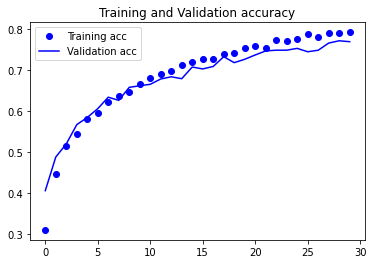

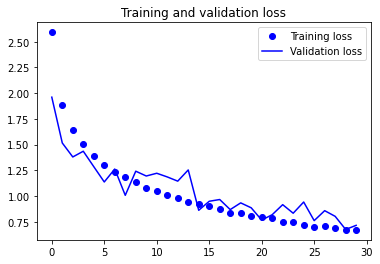

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = train_datagen.flow_from_directory(test_dir, 
                                                    target_size = (50, 50),
                                                    batch_size = 20,
                                                    class_mode = 'categorical') 
test_loss, test_acc=model.evaluate_generator(test_generator, steps=294) #5879/20
print('test accururacy:', test_acc)

Found 5891 images belonging to 43 classes.
test accururacy: 0.7651360630989075
